# Introduction to band ratios

Welcome this notebook serves as a common starting point discussing prerequisites and
resources to get familiar with this frequency band ratio project.

In [6]:
from fooof.synth import gen_power_spectrum
from fooof.plts import *

from ratios import calc_band_ratio

## Project Overview
This project explores frequency band ratios - a metric used in spectral analysis previously used as a biomarker to characterize ADHD, measure cognitive functions and others. These notebooks will walkthrough how band ratios are calculated and how they can lead to misestimations and be blatantly wrong. The contents of these notebooks will be layed out as followed:

- Run simulations which varies one parameter of a power spectrum while keeping the other parameters constant. This will characterize the extent to which each parameter influences band ratio measures.

- Run simulations which varies two parameters while keeping the rest constant. This will show how interacting parameters can affect ratio measures.

- Analyze EEG datasets to confirm or reject our findings from the simulation.

In [7]:
# Settings
theta_band = [4, 8]
beta_band = [15, 25]
freq_range = [1, 50]
back_params = [0, 1]
oscs = [6, 0.5, 1, 25, 0.5, 1]

## What is a band ratio

Given a power spectrum, a band ratio is a measure of power contained within two frequency bands. It is the ratio of area under the curve between two frequency ranges. Typically ratios are calculated as 'low band power' / 'high band power'

The following cell generates a PSD and highlights the frequency ranges used to calculate a theta/beta band ratio.

In [8]:
fs, ps = gen_power_spectrum(freq_range, back_params, oscs)

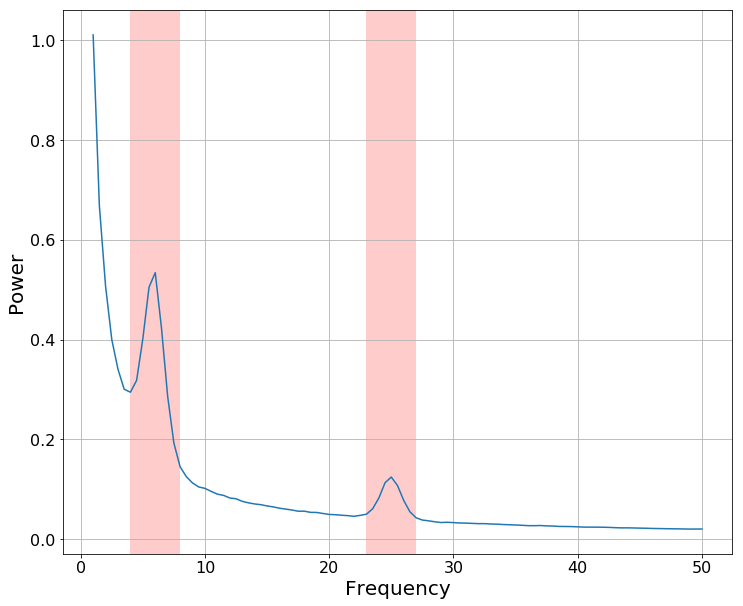

In [9]:
plot_spectrum_shading(fs, ps, [[4, 8], [23,27]])

# Calculate theta/beta ratios 

### Average Power Ratio

This is the most cannonical way of calculating band ratios. The idea here is that we we take average power in a frequency band and divide it by the average power in the other frequency band. Average power is calculated as the sum of all discrete power values divided by number on power values in that band.

In [10]:
ap_ratio = calc_band_ratio(fs, ps, theta_band, beta_band)
ap_ratio

5.938734350151825

And there you have it - our first computed frequency band ratio!

## Applications of band ratios

Frequency band ratios applications include: 
 - usage as a biomarker to characterize [ADHD](https://www.ncbi.nlm.nih.gov/pubmed/20713113)
 - characterize [short-term memory and reasoning abilities](https://www.frontiersin.org/articles/10.3389/fnagi.2017.00364/full)
 - tracking changes of [Alzheimer patients](https://www.karger.com/Article/PDF/63576?casa_token=oCurF8MGsVoAAAAA:plw77y2Y7JKSETI2gEoSjOSS7TjqK5fc8_JInKl5gS3bgfIa5kTMyHVePCTgmDFJQglMT-5R5g)
 
among others.

The following notebooks will demonstrate how the band ratio metric can lead to both systematic mis-etimations and flat out be wrong.